In [127]:
# Imports
%matplotlib inline
import json
import numpy as np
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt

In [128]:
# Paths
base_dir = "../.."
results_file = base_dir + "/results/results_gensample_96451_v1.json"
gensample_actuals = base_dir + "/data/gensample_hdf5_files/test_96451_5000.json"

In [129]:
# Read JSON files
with open(results_file,'r') as rf, open(gensample_actuals,'r') as gs:
    predictions = sorted(json.load(rf), key=itemgetter('id'))
    actuals = json.load(gs)

In [130]:
#
# Validation function that finds FP and FN in a single prediction and actual sightline.
#

EPSILON = 0.003   # Amount of error in the DLA Z value between prediction and actual, +-0.0037 ~= +-10px

def validate_sightline(prediction, actual):
    false_positives = []
    false_negatives = []
    col_density_error = []
    
    # Check each predicted DLA against all actual DLAs for false_positives and for col_density error
    for pred_dla in prediction['dlas']:
        dla_z = pred_dla['z_dla']
        matches = False
        for act_dla_ix in range(0, actual['nDLA']):
            act_dla = actual[str(act_dla_ix)]
            if abs(dla_z - act_dla['zabs']) < EPSILON:
                matches = True
                col_density_error.append(pred_dla['column_density'] - act_dla['NHI'])
        if not matches:
            false_positives.append(pred_dla)
        
    # Check each actual DLA against all predicted DLAs for false_negatives
    for act_dla_ix in range(0, actual['nDLA']):
        act_dla = actual[str(act_dla_ix)]
        matches = False
        for pred_dla in prediction['dlas']:
            dla_z = pred_dla['z_dla']
            if abs(dla_z - act_dla['zabs']) < EPSILON:
                matches = True
        if not matches:
            false_negatives.append(act_dla)

    return false_positives, false_negatives, col_density_error

# ix = 5
# validate_sightline(results[ix], gensample[str(ix)])

# Count of False Positives, False Negatives and Column Density stats

In [131]:
# List misclassified results
all_false_positives = []
all_false_negatives = []
all_coldensity_diff = []

for i in range(0,5000):
    fp, fn, cd = validate_sightline(predictions[i], actuals[str(i)])
    for f in fp: 
        f['id'] = predictions[i]['id']
        f['z_qso'] = predictions[i]['z_qso']
    for f in fn:
        f['id'] = i
        f['sl'] = actuals[str(i)]['sl']
    all_false_positives.extend(fp)
    all_false_negatives.extend(fn)
    all_coldensity_diff.extend(cd)

mean_col_density = np.mean(all_coldensity_diff)
rmse_col_density = np.sqrt(np.mean(np.array(all_coldensity_diff)**2))

print "False positive count: %d, false negative count: %d, mean col density diff: %02f, RMSE: %02f\n" %\
    (len(all_false_positives), len(all_false_negatives),\
     mean_col_density, rmse_col_density)

False positive count: 1332, false negative count: 1004, mean col density diff: -0.005591, RMSE: 0.131591



# Plot column density error

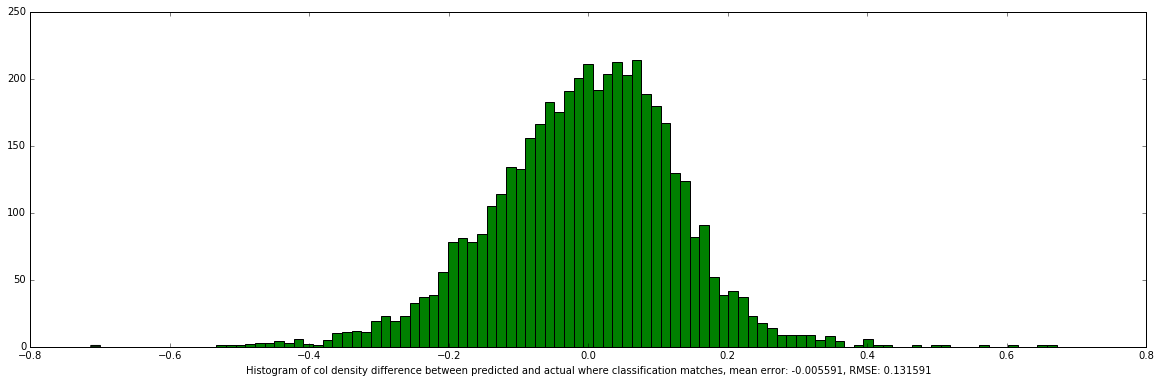

In [132]:
plt.figure(figsize=(20, 6))
plt.hist(all_coldensity_diff, 100, facecolor='green');
plt.xlabel("Histogram of col density difference between predicted and actual where classification matches, " + \
           "mean error: %06f, RMSE: %06f" % (mean_col_density, rmse_col_density))

# Display False Positives list

In [133]:
print json.dumps(all_false_positives, indent=1)

[
 {
  "std_column_density": 0.02642824500799179, 
  "column_density": 20.43389892578125, 
  "spectrum": 5321.082592667942, 
  "rest": 1154.6696573225297, 
  "dla_confidence": 0.9746270179748535, 
  "z_qso": 3.608315944671631, 
  "id": "test_96451_5000_ix_0005", 
  "z_dla": 3.3770781484020675
 }, 
 {
  "std_column_density": 0.0885598435997963, 
  "column_density": 20.506214141845703, 
  "spectrum": 5024.582714960762, 
  "rest": 1076.1296627526574, 
  "dla_confidence": 0.9847927093505859, 
  "z_qso": 3.669123888015747, 
  "id": "test_96451_5000_ix_0016", 
  "z_dla": 3.1331798226169614
 }, 
 {
  "std_column_density": 0.1356775313615799, 
  "column_density": 20.89310646057129, 
  "spectrum": 5645.468649299897, 
  "rest": 1029.0986928066718, 
  "dla_confidence": 0.983767032623291, 
  "z_qso": 4.485837936401367, 
  "id": "test_96451_5000_ix_0017", 
  "z_dla": 3.6439154123239836
 }, 
 {
  "std_column_density": 0.021498195827007294, 
  "column_density": 20.355182647705078, 
  "spectrum": 4489

# Display False Negatives list

In [134]:
print json.dumps(sorted(all_false_negatives, key=itemgetter('id')), indent=1)

[
 {
  "zabs": 2.1295992508382686, 
  "NHI": 20.748661634216248, 
  "id": 7, 
  "sl": 2619
 }, 
 {
  "zabs": 3.129716255390271, 
  "NHI": 20.3959540888299, 
  "id": 16, 
  "sl": 736
 }, 
 {
  "zabs": 3.637218423732374, 
  "NHI": 21.09707433316757, 
  "id": 17, 
  "sl": 3998
 }, 
 {
  "zabs": 3.382754897629892, 
  "NHI": 21.062107589254587, 
  "id": 37, 
  "sl": 3746
 }, 
 {
  "zabs": 3.1758938719616467, 
  "NHI": 20.847271263963876, 
  "id": 42, 
  "sl": 3647
 }, 
 {
  "zabs": 2.37685736075216, 
  "NHI": 21.203599747955213, 
  "id": 47, 
  "sl": 3123
 }, 
 {
  "zabs": 3.552623560860874, 
  "NHI": 20.560522520905607, 
  "id": 50, 
  "sl": 3082
 }, 
 {
  "zabs": 3.692302836200199, 
  "NHI": 21.71601444438807, 
  "id": 52, 
  "sl": 3435
 }, 
 {
  "zabs": 3.0555343496538065, 
  "NHI": 21.14994667380584, 
  "id": 54, 
  "sl": 3658
 }, 
 {
  "zabs": 4.007340358525371, 
  "NHI": 20.774652795769157, 
  "id": 64, 
  "sl": 76
 }, 
 {
  "zabs": 2.7905579007601586, 
  "NHI": 21.862091416243388, 
 